In [7]:
:dep plotly = { version = "=0.8.0" } # 0.8.1 has breaking changes
:dep itertools-num = "0.1.3"
:dep num = "0.4.0"

In [8]:
#![allow(warnings)]

In [9]:
use itertools_num::linspace;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Bar, Plot, Scatter};

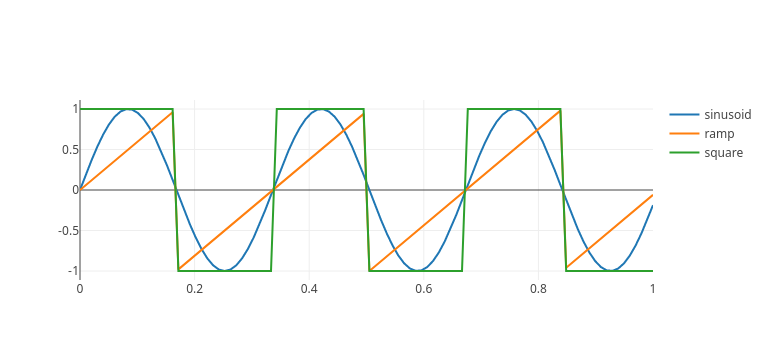

In [10]:
use core::f32::consts::PI;
use num::complex::Complex;

/// fs:      samplerate
/// f:       frequency in hz
/// phi:     starting phase
/// samples: number of samples
fn sinusoid(fs: f32, f: f32, phi: f32, samples: usize) -> Vec<f32> {
    let T = 1. / fs;
    let w = 2. * PI * f;
    
    let mut ys = vec![0.0; samples];
    for (x, y) in ys.iter_mut().enumerate() {
        let x = x as f32;
        *y = (w * x * T + phi).cos();
    } 
    ys
}

fn ramp(fs: f32, f: f32, phi: f32, samples: usize) -> Vec<f32> {
    let T = 1. / fs;
    let w = 2. * f;
    let phi = ((2. * phi) - PI) / (2. * PI);
    
    let mut ys = vec![0.0; samples];    
    for (x, y) in ys.iter_mut().enumerate() {
        let x = x as f32;
        *y = ((w * x * T + phi + 2.) % 2.) - 1.;
    } 
    ys
}

fn square(fs: f32, f: f32, phi: f32, samples: usize) -> Vec<f32> {
    let T = 1. / fs;
    let w = 2. * f;
    let phi = ((2. * phi) - PI) / (2. * PI);
    
    let mut ys = vec![0.0; samples];
    for (x, y) in ys.iter_mut().enumerate() {
        let x = x as f32;
        *y = num::signum(((w * x * T + phi + 2.) % 2.) - 1.);
    } 
    ys
}

let f = 3.;
let phi = -PI / 2.;
let fs = 100.;
let samples = 100;
let t = samples as f32 / fs;

// plot it
// let xs: Vec<f32> = linspace(0., (samples - 1) as f32, samples).collect();
let xs: Vec<f32> = linspace(0., t, samples).collect();

let ys_sinusoid = sinusoid(fs, f, phi, samples);
let ys_ramp = ramp(fs, f, phi, samples);
let ys_square = square(fs, f, phi, samples);

let mut plot = Plot::new();
plot.add_trace(Scatter::new(xs.clone(), ys_sinusoid).mode(Mode::Lines).name("sinusoid"));
plot.add_trace(Scatter::new(xs.clone(), ys_ramp).mode(Mode::Lines).name("ramp"));
plot.add_trace(Scatter::new(xs.clone(), ys_square).mode(Mode::Lines).name("square"));

plot.set_layout(Layout::new().height(400));
plot.lab_display();

// TODO versions with phase accumulator

### Sinusoids and complex numbers in the discrete domain

Sinusoids can be expressed in real numbers:

$$
\begin{align*}
y(n) = A \sin (\omega n T + \phi) && \omega = \text{frequency in radians/sec} = 2 \pi f, T = \frac{1}{f_s}
\end{align*}
$$

Sinusoids can also be expressed in complex numbers:

$$
\begin{align*}
y(n) = A e ^ {j (\omega n T + \phi)} = A \cos (\omega n T + \phi) + j A \sin (\omega n T + \phi)
\end{align*}
$$
